# Boston Houses Dataset 
- Exploratory Analysis

In [1]:
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [15]:
X = boston.data
y = boston.target

In [16]:
import pandas as pd
df = pd.DataFrame(X)
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
import numpy as np
u = np.mean(X,axis = 0)
std = np.std(X,axis = 0)


In [18]:
X = (X-u)/std

In [19]:
import matplotlib.pyplot as plt

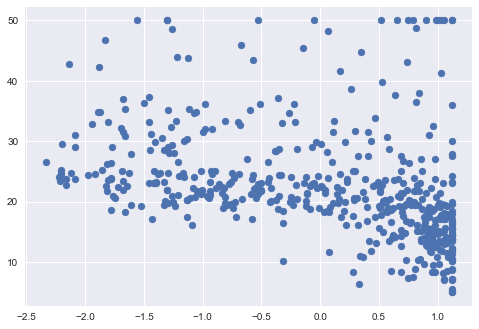

In [20]:
plt.style.use('seaborn')
plt.scatter(X[:,6],y)
plt.show()

# Section - 2 Linear Regression

In [21]:
X.shape,y.shape

((506, 13), (506,))

In [23]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
X.shape

In [24]:
X[:5,:4]

array([[ 1.        , -0.41978194,  0.28482986, -1.2879095 ],
       [ 1.        , -0.41733926, -0.48772236, -0.59338101],
       [ 1.        , -0.41734159, -0.48772236, -0.59338101],
       [ 1.        , -0.41675042, -0.48772236, -1.30687771],
       [ 1.        , -0.41248185, -0.48772236, -1.30687771]])

In [25]:
# X = matrix (m x n)
# x = vector (Single Example with n features)

def hypothesis(x,theta):
    y_ = 0.0
    n  = x.shape[0]
    for i in range(n):
        y_ += (theta[i]*x[i])
    return y_

In [31]:
def error(X,y,theta):
    e = 0.0
    m = X.shape[0]
    
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        e  += (y[i]-y_)**2
    return e/m

In [32]:
def gradient(X,y,theta):
    m,n = X.shape
    grad = np.zeros((n,))
    
    for j in range(n):
        for i in range(m):
            y_ = hypothesis(X[i],theta)
            grad[j] += (y_ - y[i])*X[i][j]
    
    return grad/m

In [51]:
def gradient_descent(X,y,alpha=0.1,max_epochs = 600):
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    for i in range(max_epochs):
        e = error(X,y,theta)
        error_list.append(e)
        
        grad = gradient(X,y,theta)
        for j in range(n):
            theta[j] = theta[j]-alpha*grad[j]
    return theta,error_list

In [52]:
import time
start = time.time()
theta,error_list = gradient_descent(X,y)
end = time.time()

In [54]:
end-start
# 9.336976766586304
# 9.361549854278564
# 18.718055963516235

18.718055963516235

In [35]:
print(theta)

[ 2.25328063e+01 -9.03091692e-01  1.03815625e+00  1.53477685e-02
  6.99554920e-01 -2.02101672e+00  2.70014278e+00 -1.93085233e-03
 -3.10234837e+00  2.34354753e+00 -1.72031485e+00 -2.04614394e+00
  8.47845679e-01 -3.73089521e+00]


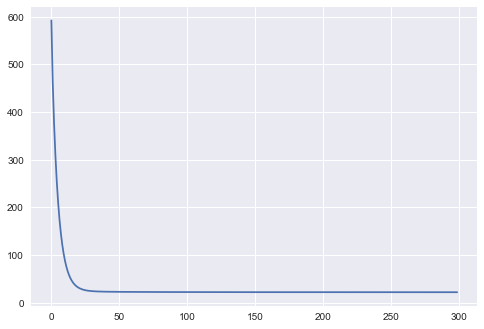

In [36]:
plt.plot(error_list)

# Predictions 



In [46]:
y_ = []
for i in range(X.shape[0]):
    pred = hypothesis(X[i],theta)
    y_.append(pred)
y_ = np.array(y_)

In [47]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y-y.mean())**2)
    score = (1-num/denom)
    return score*100

In [48]:
r2_score(y,y_)

74.04541323942743

# Efficient || Vectorization

In [84]:
def hypothesis(x,theta):
    return np.dot(X,theta)

In [85]:
def error(X,y,theta):
    error = 0.0
    m = X.shape[0]
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    return e/m

In [86]:
def gradient(X,y,theta):
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_-y))
    m = X.shape[0]
    return grad/m

In [95]:
def gradient_descent(X,y,alpha = 0.1,max_iters = 300):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        
        grad = gradient(X,y,theta)
        theta = theta-alpha*grad
    return theta,error_list

In [96]:
start = time.time()
theta,error_list = gradient_descent(X,y)
end = time.time()

In [98]:
end-start
# 1000000/600

0.04714536666870117

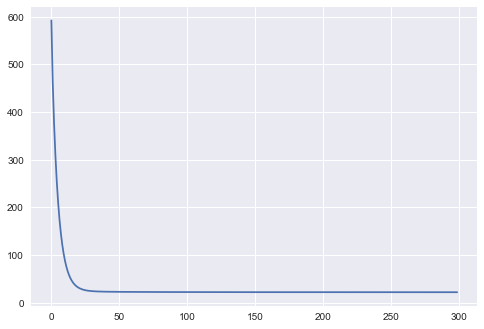

In [99]:
plt.plot(error_list)